## Mount drive

## Introduction
In this project, we will analyze data concerning agriculture funding management of community in Kenya. 

Each observation gives us details about client agriculture detail especially maize acres in two particulars districts in Kenya: **Butere** and **Busia**. 


## Ceneral Properties:
We will download our data and clean it. This first step consists in cleaning up our data in order to falicitate our analysis. This, we can:
  - Remove Duplicates
  - Deal with missing values
  - Dealing with outliers.
  - Change the data type of certain columns
  - Write properly cells values.

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
# Load data to a dataframe
df = pd.read_excel("/content/drive/MyDrive/TZ MEL Lead - Take Home Exercise - Data.xlsx")


In [5]:
# Learn the size of the dataset
df.shape

(222, 18)

There are 222 records and 18 columns in the
dataset.

In [6]:
# Let us see the different columns
df.columns

Index(['Group', 'District Name', 'Field Manager', 'Site Name', 'Field Officer',
       'Group Name', 'Client Name', 'OAFID', 'Own at least 1 cow',
       'Income in 2012', '% Repaid', 'Risky', 'Maize acres',
       'Own a Solar Light', 'Number of Bags in Storage 2012',
       'Amount of Money in Savings 2012', 'Number of Bags in Storage 2013',
       'Amount of Money in Savings 2013'],
      dtype='object')

The different columns present in the data table are:
- **Group**: either under the control of One Acre Funds or not.
- **District Name**: The different districts studied in our sample data.
- **Group Name**: Association of farmers that work on a common project together.
- **Field Manager**: The person in charge of the association of farmers **One Acre Funds** support.
- **Field officer**: The person on the field to supervise the association of farmers and collect the feedback.
- **Site Name**: Where the association is based in a district.
- **Client Name**: The clients' *One Acre Funds* provides financial funding for the field.
- **Own at least 1 cow**: Does the client own at least one cow or not?
- **OAFID**: One Acre Fund Identity
- **Income in 2012**: Client income in 2012.
- **% Repaid**: To what percentage has the association repaid back the fund provided for investment?
- **Risky**: Is it risky for One Acre Fund to invest on the client? `No` is It is not risky or `Yes` It is. 
- **Maize acres**: The number of maize acres that the client possesses
- **Own a Solar Light**: The client owns (or does not own) a Solar Light.
- **Number of Bags in Storage 2012**: The number of bags the client has saved in 2012.
- **Amount of Money in Savings 2012**: The amount of money the client has made from farming in 2012.
- **Number of Bags in Storage 2013**: The number of bags the client has saved in 2012.
- **Amount of Money in Savings 2013**: The amount of money the client has made from farming in 2012.

In [7]:
# Let's have an initial view on the data
df.sample(5)

,Group,District Name,Field Manager,Site Name,Field Officer,Group Name,Client Name,OAFID,Own at least 1 cow,Income in 2012,% Repaid,Risky,Maize acres,Own a Solar Light,Number of Bags in Storage 2012,Amount of Money in Savings 2012,Number of Bags in Storage 2013,Amount of Money in Savings 2013
177,Control,Busia,NaN,Mundika,NaN,NaN,Petronila Nabwire,789,True,10250,NaN,NaN,1.25,1,7,1400,7,1400
201,Control,Busia,NaN,Mundika,NaN,NaN,Sarah Jumah,796,False,7050,NaN,NaN,0.50,0,1,100,1,300
92,Control,Busia,NaN,Namboboto,NaN,NaN,Jacklyne Anyango Pamba,2678,False,6425,NaN,NaN,0.50,0,5,5000,5,5000
152,Control,Butere,NaN,Emalindi,NaN,NaN,Meshack Mbukha,13774,False,13600,NaN,NaN,5.00,1,2,1100,2,1100
110,Control,Butere,NaN,Mulwanda,NaN,NaN,Joseph Ongale,12937,False,6800,NaN,NaN,0.50,0,3,400,3,300


At first sight, we can see that there are missing values in our data that we will further investigate very soon.

In [8]:
# And another view on the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Group                            222 non-null    object 
 1   District Name                    222 non-null    object 
 2   Field Manager                    111 non-null    object 
 3   Site Name                        222 non-null    object 
 4   Field Officer                    111 non-null    object 
 5   Group Name                       111 non-null    object 
 6   Client Name                      222 non-null    object 
 7   OAFID                            222 non-null    int64  
 8   Own at least 1 cow               222 non-null    bool   
 9   Income in 2012                   222 non-null    int64  
 10  % Repaid                         111 non-null    float64
 11  Risky                            111 non-null    float64
 12  Maize acres           

### Here are some initial observations:
There are 18 independent variables in the dataset.
The dataset does contain variables  with missing values (NaNs) and variables that do not have any missing values. And the variables with missing values have up to 111 missing values(NaN). 
- The **Own a Solar Light** data type is **integer** but should be **boolean**.
- The **Number of Bags in Storage 2012** data type is an **object** and should be an **integer**.
- The **Amount of Money in Savings 2012** data type is an **integer** and should be **float**.
- The **Amount of Money in Savings 2013** data type is an **integer** and should be **float**
- **Risky** is *`float`* and should be converted into *`boolean`*. 
- The variables: **Field manager, Field Officer, Group Name, % Repaid, and Risky** containt missing values. 




## Data Cleaning
In this section, we want to amend some columns in df, such as the data type, misspellings and erronous data:
### Finding Duplicates

In [9]:
# check for duplicated rows
dups = df[df.duplicated() == True].count()

# check for duplicated patients
dups_id = df['OAFID'][df['OAFID'].duplicated() == True].count()

print('Duplicated rows: ', dups.sum())
print('Duplicated patient ids: ', dups_id)


Duplicated rows:  0
Duplicated patient ids:  1


### Change Data type to the appropriate one.

In [10]:
# Convert data type to their appropriate format
df['Own a Solar Light'] = df['Own a Solar Light'].astype('bool')
df['Amount of Money in Savings 2012'] = df['Amount of Money in Savings 2012'].astype('float64')
df['Amount of Money in Savings 2013'] = df['Amount of Money in Savings 2013'].astype('float64')

Now let us deal with the case of **Number of Bags in Storage 2012**




In [11]:
# Replace object valeur with integer
df['Number of Bags in Storage 2012']=df['Number of Bags in Storage 2012'].replace("seven", 7)
df['Number of Bags in Storage 2012']=df['Number of Bags in Storage 2012'].replace("six", 6)
df['Number of Bags in Storage 2012']=df['Number of Bags in Storage 2012'].replace("four", 4)

# Convert into integer
df['Number of Bags in Storage 2012'] = df['Number of Bags in Storage 2012'].astype('int')

### Observations of different variables.

In [12]:
# Print Unique Values of Group
df["Group"].unique()

array(['Control', 'Test', 'Con', 'Cont', 'Contr', 'Te st', 'Test.', 'Tes'],
      dtype=object)

We can see that our dataset is group in two categories: **Control** and **Test**. Let us now make it look more proper. This means: *The zone is already control of **One Acre fund** or it is in test.* 

### Rewrite values of cells properly.

In [13]:
# Replace the names: "Con", "Cont", "Contr" into "Control"
df['Group']=df['Group'].replace("Con", "Control")
df['Group']=df['Group'].replace("Cont", "Control")
df['Group']=df['Group'].replace("Contr", "Control")

# Replace the names: "Te st", "Test.", "Tes" into "Test"
df['Group']=df['Group'].replace("Te st", "Test")
df['Group']=df['Group'].replace("Tes", "Test")
df['Group']=df['Group'].replace("Test.", "Test")

In [14]:
# Print Unique Values District Name
print(df["District Name"].unique())

# Count Number of Unique Values Field Manager
print("There are {} different Districts in the community studied.".format(df["District Name"].nunique()))

['Butere' 'Busia']
There are 2 different Districts in the community studied.


In [15]:
# Print Unique Values Field Manager 
print(df["Field Manager"].unique())

# Count Number of Unique Values Field Manager
print("There are {} different field managers in the zone convered by the study.".format(df["Field Manager"].nunique()-1))

[nan 'Patrick Anyanje Otaaba' 'Magdalene Nelima' 'Jorum Asira'
 'Andrew Akhura' 'Joselyn Mainya' 'Benard Wesonga' 'Moses Wenani'
 'Vincent Oulo' 'Jackson Anangasa' 'Winnie Ondiege' 'Rodgers Alukhaba'
 'Regina Maloba Keya' 'Zainabu Omutaita' 'Raventine Abuti'
 'Jackson Makomere']
There are 14 different field managers in the zone convered by the study.


In [16]:
# Print Unique Values Site Name
print(df["Site Name"].unique())

# Count Number of Unique Values site names
print("There are {} different sites in the zone convered by the study.".format(df["Site Name"].nunique()))

['Bushieni' 'Eshikalame' 'Murende' 'Lundha' 'Namboboto' 'Siriwo' 'Bumamu'
 'Busende' 'Sigulu' 'Munongo' 'Luchululo' 'Buboko' 'Lukohe' 'Mundika'
 'Buchenya' 'Bukiri' 'Bukhulungu' 'Muyafwa' 'Ebuhala' 'Emalindi'
 'Eshirembe' 'Emahene' 'Bushitinji' 'Khurale' 'Mulwanda' 'Malanga'
 'Yiro West' 'Ematende' 'Wakhungu' 'Bukati' 'Got Regea']
There are 31 different sites in the zone convered by the study.


In [17]:
# Print Unique Values Field Officer
print(df["Field Officer"].unique())


# Count Number of Unique Values Field Officer
print("There are {} different field officers in the community.".format(df["Field Officer"].nunique()-1))

[nan 'Habil Indakwa' 'Catherine Murabula' 'Veronica Musuku'
 'Wilberforce Mudeyi' 'Godfrey Ojiambo' 'Phillip Omuyonga' 'Job Wekesa'
 'Metrine Lusweti' 'Elton Barasa' 'Richard Okubasu' 'Silas Adala'
 'Dickson Etwasi' 'Godfrey Barasa' 'Christine Anyango' 'Ezekiel Bwire'
 'Mercy Adhiambo Oketch' 'Dedan Ogol' 'Peter Wesonga' 'Benson Amakobe'
 'Janet Afande' 'Peris Omukangu' 'Fransisca Wangatia' 'Patrick Mahero'
 'Johnstone Angaya S.' 'Sophy Bungei' 'Tom Wafula' 'Ruth Anyango'
 'Fatuma Awinja' 'Wellingtone Aruwa' 'Livingstone Nyongesa' 'Paul Waliaro']
There are 30 different field officers in the community.


In [18]:
# Print Unique Values Group Name
print(df["Group Name"].unique())

# Count Number of Unique Values Group Name
print("There are {} different associations in the community studied.".format(df["Group Name"].nunique()-1))

[nan 'Ebubule' 'Pamoja' 'Tumaini Farmers' 'Ukulima Bora' 'Lekha Baleke'
 'Baraka' 'Namagumba' 'Ushindi' 'Busubiri' 'Mt. Elgon' 'Wekhonye'
 'Munyanza' 'Bidii SHG' 'Nyando Farmers' 'Mungore C' 'Jipange'
 'Sisi kwa Sisi' 'Maono' 'Abaliho' 'Lunyiko S.H.G' 'Tuamke' 'Temakho'
 'Riziki' 'Furaha' 'Jembe' 'Upendo' 'Gulumoyo 1' 'Bahati' 'Yie Gi Kinda'
 'Ebuti' 'Mwibanda' ' Israel' 'Hope' 'Pamoja Tujengane' 'Bidii Yetu'
 'Eshiamba' 'Abekhale' 'Mungore B' 'Mwema' 'Huruma' 'Bupala 2' 'Tujiinue'
 'Upendo OAF' 'Tumaini' 'Ndagaria White' 'Namikoye B' 'Mungano'
 'Ohalabana Huwaria']
There are 47 different associations in the community studied.


In [19]:
# Print Unique Values Client Name
print(df["Client Name"].unique())

# Count Number of Unique Values Client Name
print("There are {} differents clients in the community.".format(df["Client Name"].nunique()))

['Aggrey Nyanje' 'Aggrey W. Ongaro' 'Agnes Obura' 'Agnes Olwande Otwuoma'
 'Alice Akuku Ouma' 'Alice Akumu' 'Alima A Muchanji'
 'Almerida Agola Odiedo' 'Anastancia S. Wamukoya' 'Anjelica S Awino'
 'Anjeline Ajiambo' 'Anjeline Makokha' 'Anlice Wandera' 'Ann Ayuma'
 'Ann Olando' 'Anthony Were Boi' 'Batholomew Wabwire' 'Beatrice A Oundo'
 'Beatrice Akhaule' 'Beatrice Asike' 'Beatrice Atsali'
 'Beatrice Awino Namanya' 'Beatrice Okello' 'Bethseba M Oboyo'
 'Bonaface Okello' 'Braxidice L Nyongesa' 'Caroline Jesca'
 'Catherine Ominde' 'Charles Andati' 'Charles K Were' 'Charles Odhiambo'
 'Cherles A Ochieno' 'Christine Ongeso' 'Christopher A. Openda'
 'Christopher Obango' 'Clarice Anyango' 'Consepter Night' 'Conslata Awino'
 'Cyprian G Wanyama' 'David O. Makokha' 'Deporah Akiso' 'Desima Makokha'
 'Dorica M. Nasio' 'Dorice Chengo' 'Edith Osale' 'Elizabeth Eshianyisa'
 'Emily Egesa Onyango' 'Enesi Tikolo' 'Ernest A. Makokha'
 'Ernest M. Mumali' 'Ernest Matseshe Opanda' 'Ester Achayo'
 'Esther N.

In [20]:
# Print Unique Values of Own at least 1 cow
print(df["Own at least 1 cow"].unique())

[False  True]


In [21]:
# Print Unique Values of Risky
print(df["Risky"].unique())

[nan  0.  1.]


We observe easily that **Risky** variable is a boolean data type.
### Let us convert it to appropriate type: 

In [22]:
# Replace NaN by 7 
df["Risky"] = df["Risky"].replace(np.nan, 7)

# Convert data type into int:
df['Risky'] = df['Risky'].astype('bool')

# Replace back 7 by NaN.
df["Risky"] = df["Risky"].replace(7, np.nan)

In [23]:
# Print Unique Values of OAFID
print(df["OAFID"].unique())

# Count Number of Unique Values OAFID
print("There are {} different unique One Acre Funds Identity in the dataset.".format(df["OAFID"].nunique()))

[  952  5541   906  4791  2680 12508 40722  3721  5534   900  3589  1944
  3845  5714 25722  3725   901  3590  1764  1945 25733  2684  8231  2632
  2780 40729  2943  8219  8225 42823 15129  2704  3388  3310  3344 12503
  2698  3583  2621   427 13793  1946  3313 16213 39717 26060  2633  3329
  7523  5540  8227  5437  8716  2636 29506 15130  1870 25731  3337  4036
 10236  8279  5010 41420  1953   829 12700 39291  2195 12501  3288  7575
  3018  2199   549 43730  1849  1106  8837  2226  1102  4024  1256  3864
 14731  2194 43217 13860   899 12706  5444   835  2678  5313  3551  1852
 16056 12301 12712  9397   886 13659 13792  2903 12701 12713  5254 12298
  1476 15450 12937  3554  2783  1471 12707 13798  4319  7679  2221  1103
 41829 17284 29507  1477 13662  1084  5694 13664   892 43220  2784   895
  3550 13815  1859  8275 17573 12299  1472  5988 43675  3553   208  1921
   264   217  1927  1922   209  4631   445 13774  5986  3991  5987   216
 13819 12527 12304 12303  1470 16527  1858 12931 13

In [24]:
# Find duplicated OAFID
df['OAFID'][df['OAFID'].duplicated()==True]

131    900
Name: OAFID, dtype: int64

The One Acre Fund Identity that is duplicated is **900**.

In [25]:
# Print Unique Values of % Repaid
print(df["% Repaid"].unique())

[  nan 100.   59.5  22.6  82.3  31.9  37.5  87.8  58.2  28.4 104.7  38.4
  53.1  75.3  43.3  78.9  30.7  84.9  48.2  49.2  97.3  65.9 105.7  70.9
  25.9  83.6  89.1  71.1  47.7  44.9  74.3  55.6  48.3  50.3  44.8  56.1
  70.3  36.2  76.8  26.6  37.1  52.2  96.5  41.3  42.6  22.4  57.1  56.2
  78.2  87.   24.8  51.5  36.   51.7  31.6  68.8  51.8  48.   67.7  23.9
  34.1  79.3  87.5  85.8  74.6  34.   69.5  59.   73.7  61.1  40.3  41.1
  61.   39.7  57.4  40.2  32.1  29.8  75.5  59.1  72.4  90.3  60.4  81.5
  49.  104.2]


In [26]:
# Print Unique Values of Number of Bags in Storage 2012
print(df["Number of Bags in Storage 2012"].unique())

[  1   2   7   5   0   3   4   8   6   9 208]


In [27]:
# Print Unique Values of Number of Bags in Storage 2013
print(df["Number of Bags in Storage 2013"].unique())

[  1   6   8   5   0   3   4   7   2  10   9  12  15  11  13 304]


In [28]:
# Print Unique Values of Maize acres
print(df["Maize acres"].unique())

[1.00e+00 5.00e-01 1.25e+00 1.50e+00 3.00e+00 7.50e-01 2.00e+00 4.00e+00
 5.00e+00 1.00e+04 1.50e+03]


In [29]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Group                            222 non-null    object 
 1   District Name                    222 non-null    object 
 2   Field Manager                    111 non-null    object 
 3   Site Name                        222 non-null    object 
 4   Field Officer                    111 non-null    object 
 5   Group Name                       111 non-null    object 
 6   Client Name                      222 non-null    object 
 7   OAFID                            222 non-null    int64  
 8   Own at least 1 cow               222 non-null    bool   
 9   Income in 2012                   222 non-null    int64  
 10  % Repaid                         111 non-null    float64
 11  Risky                            222 non-null    bool   
 12  Maize acres           

## Descriptive Statistics

In [30]:
# print a summary of the data in df
df.describe()

,OAFID,Income in 2012,% Repaid,Maize acres,Number of Bags in Storage 2012,Amount of Money in Savings 2012,Number of Bags in Storage 2013,Amount of Money in Savings 2013
count,222.000000,222.000000,111.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,8649.527027,8652.477477,65.354054,52.779279,4.225225,633.783784,5.486486,631.081081
std,10838.277071,1953.161826,26.018825,678.139290,13.998180,758.531033,20.358935,773.414421
min,208.000000,6300.000000,22.400000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,1883.500000,7050.000000,41.950000,0.500000,1.000000,100.000000,2.000000,0.000000
50%,3701.500000,7950.000000,61.000000,1.000000,3.000000,400.000000,4.000000,400.000000
75%,12656.750000,10250.000000,89.100000,1.000000,5.000000,975.000000,6.000000,900.000000
max,49518.000000,16400.000000,105.700000,10000.000000,208.000000,5000.000000,304.000000,5500.000000


## Observation

From the first glance, we can see that: 
- we need to keep a close eye on the maximum number of maize acres because the **10000 Maize acres** seems to have outliers.
- **75% of Maize** are cultivated on less **one acre**.
- **208 Bags of maize stored in 2012** seems to be an outlier and need to dig.
- **304 Bags of maize stored in 2013** seems to be an outlier and need to dig.
- The smallest amount saved in 2012 is **0**, the maximum amount of money saved in 2012 is **5000**. And this maximum seems to be very higher compared to 75% of the amount of money saved the same year which is less than **975**. The average amount of money saved in 2012 is **400**.
- The smallest amount saved in 2013 is **0**, the maximum amount of money saved in 2013 is **5500**. And this maximum seems to be very higher compared to 75% of the amount of money saved the same year which is less than **900**. The average amount of money saved in 2013 is **400**.
- The smallest income in 2012 is **6300**, the maximum income in 2012 is **16400**. 75% of income in 2012 is less than **10250**. The average income in 2012 is **7950**.

## Produce histograms for baseline savings & maize acres BY GROUP

In [31]:
# table with the Maize acres and the Amount of Money in Savings 2012
oafid_tbl = pd.DataFrame(df.groupby(['Maize acres','Amount of Money in Savings 2012'])['OAFID'].count()).reset_index()
oafid_tbl

,Maize acres,Amount of Money in Savings 2012,OAFID
0,0.5,0.0,18
1,0.5,100.0,10
2,0.5,200.0,7
3,0.5,300.0,6
4,0.5,400.0,6
...,...,...,...
77,4.0,0.0,2
78,4.0,1400.0,1
79,5.0,1100.0,2
80,1500.0,300.0,1


### Number of farmers group's with the maximum amount of money saved in 2012 

In [32]:
oafid_tbl[oafid_tbl['Amount of Money in Savings 2012'] >= 1500]

,Maize acres,Amount of Money in Savings 2012,OAFID
13,0.50,1500.0,1
14,0.50,1600.0,1
15,0.50,1700.0,1
16,0.50,2000.0,3
17,0.50,3000.0,1
18,0.50,5000.0,2
29,0.75,1500.0,1
30,0.75,3000.0,1
46,1.00,1500.0,1
47,1.00,1800.0,2


There are two group of farmers with that has a maximum amount of money saved in 2012 and there have 0.5 maize acre of surface. 

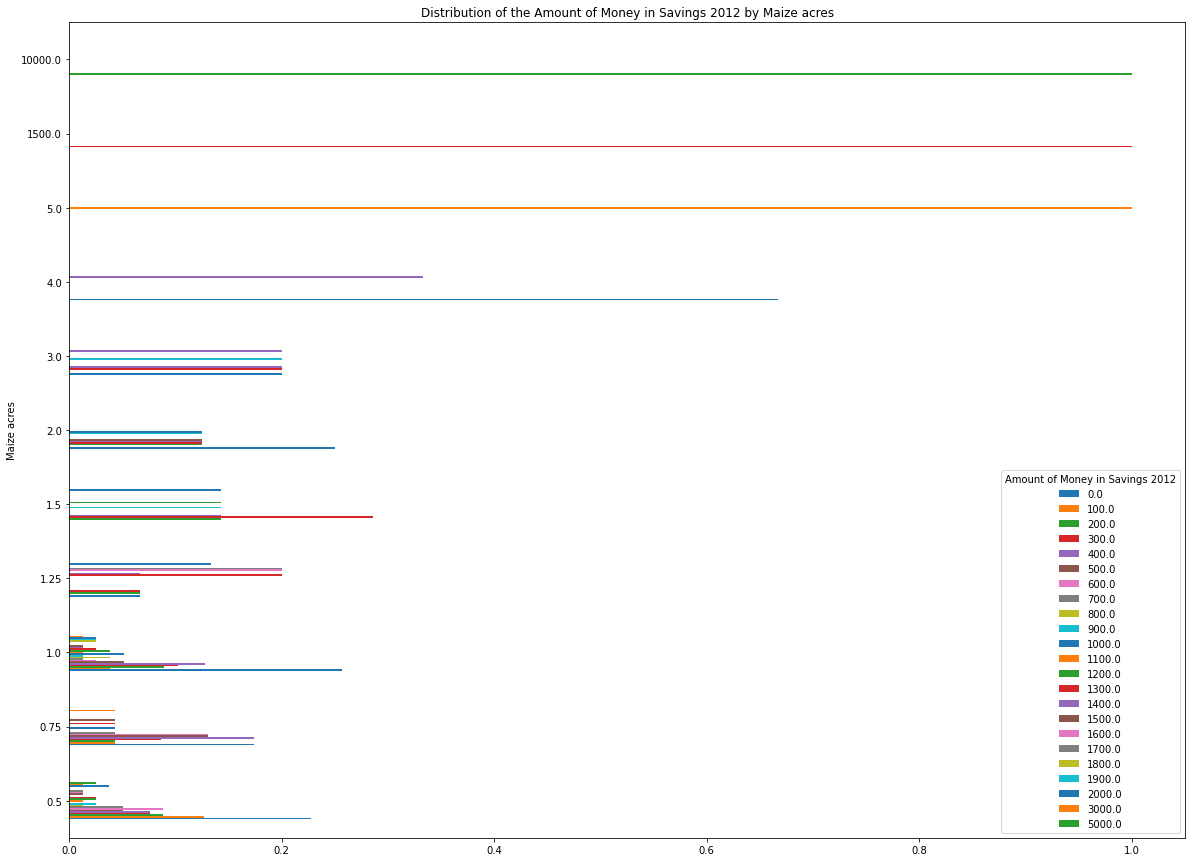

In [33]:
# Amount of Money in Savings 2012 by Maize acres
maize = df.groupby('Maize acres')['Amount of Money in Savings 2012'].value_counts(normalize=True).unstack().plot(kind='barh', figsize=(20,15))
maize.set_title("Distribution of the Amount of Money in Savings 2012 by Maize acres")
plt.show()

From the table above, we can clearly see that farmers' with small land surface has no money saved or they have a very little  amount of money saved. Just a few  farmers saved more that **1000**.  Therefore, maize acres does not seem to be an important feature.

In [34]:
# table with the Maize acres and the Amount of Money in Savings 2013
oafid_tbl = pd.DataFrame(df.groupby(['Maize acres','Amount of Money in Savings 2013'])['OAFID'].count()).reset_index()
oafid_tbl

,Maize acres,Amount of Money in Savings 2013,OAFID
0,0.5,0.0,20
1,0.5,100.0,6
2,0.5,200.0,6
3,0.5,300.0,10
4,0.5,400.0,4
...,...,...,...
77,4.0,1600.0,1
78,5.0,1100.0,1
79,5.0,1300.0,1
80,1500.0,400.0,1


In [54]:
oafid_tbl[oafid_tbl['Amount of Money in Savings 2013']>= 1500]

,Maize acres,Amount of Money in Savings 2013,OAFID
13,0.50,1500.0,2
14,0.50,1800.0,1
15,0.50,1900.0,1
16,0.50,2000.0,1
17,0.50,2200.0,2
18,0.50,5000.0,1
19,0.50,5500.0,1
28,0.75,1500.0,1
29,0.75,1700.0,1
30,0.75,3300.0,1



There is one group of farmers with that has a maximum amount of money saved in 2013 and there have 0.5 maize acre of surface.

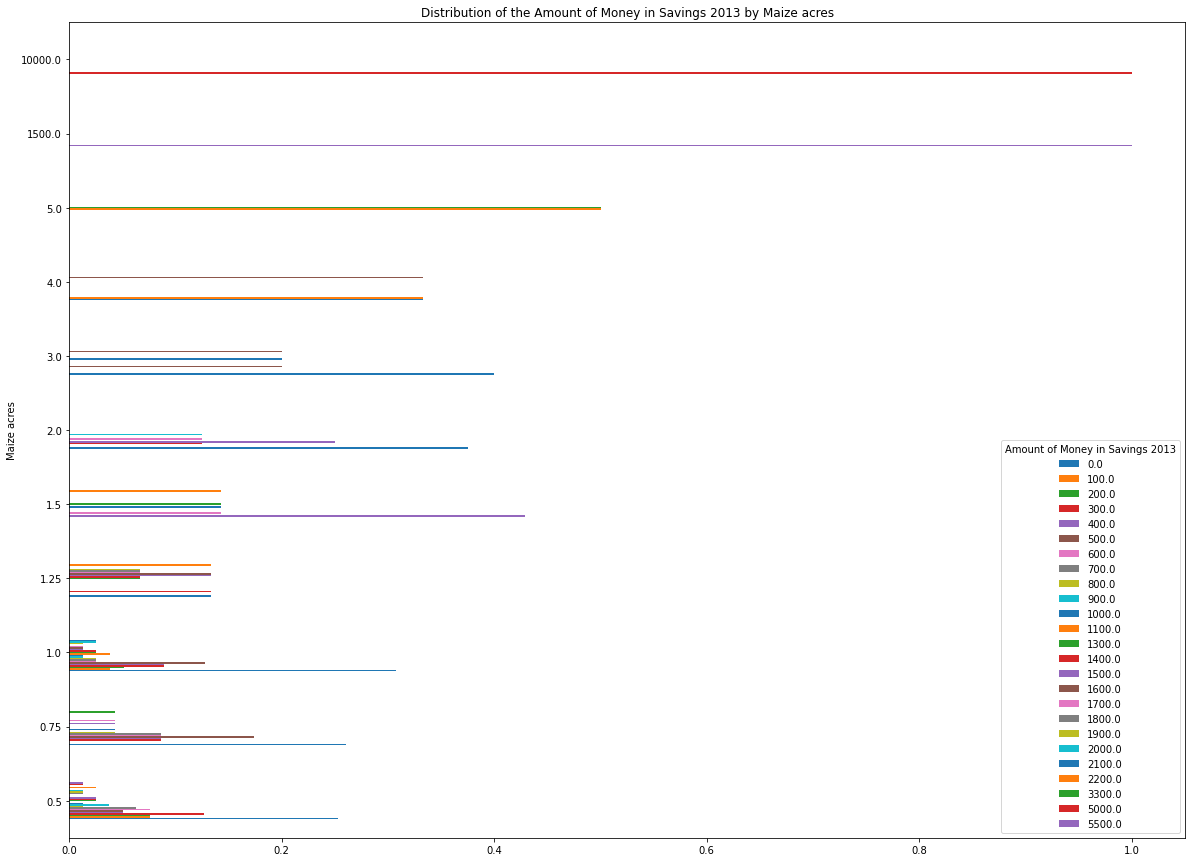

In [36]:
# Amount of Money in Savings 2013 by Maize acres
maize = df.groupby('Maize acres')['Amount of Money in Savings 2013'].value_counts(normalize=True).unstack().plot(kind='barh', figsize=(20,15))
maize.set_title("Distribution of the Amount of Money in Savings 2013 by Maize acres")
plt.show()

From the table above, we can clearly see that farmers' with small land surface has no money saved or they have a very little amount of money saved. Just a few farmers saved more that 1000. Therefore, maize acres does not seem to be an important feature.

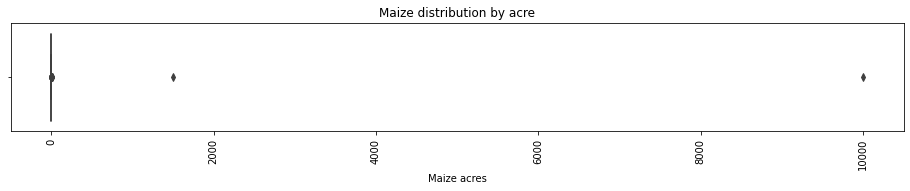

In [37]:
# Look at the distribution of the Maize acres feature
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_maize = sns.boxplot(x=df['Maize acres'])
dist_maize.set_title("Maize distribution by acre")
plt.show()

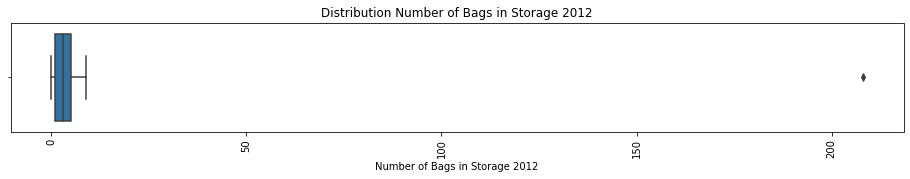

In [38]:
# Look at the distribution of the Number of Bags in Storage 2012 feature
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_maize = sns.boxplot(x=df['Number of Bags in Storage 2012'])
dist_maize.set_title("Distribution Number of Bags in Storage 2012")
plt.show()

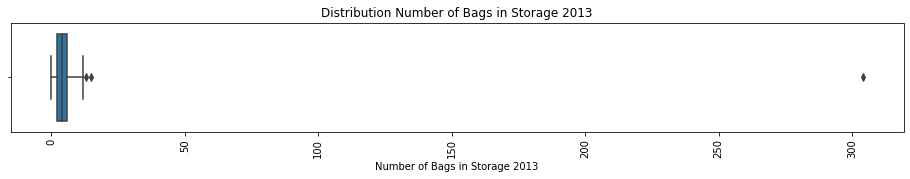

In [39]:
# Look at the distribution of the Number of Bags in Storage 2013 feature
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_maize = sns.boxplot(x=df['Number of Bags in Storage 2013'])
dist_maize.set_title("Distribution Number of Bags in Storage 2013")
plt.show()

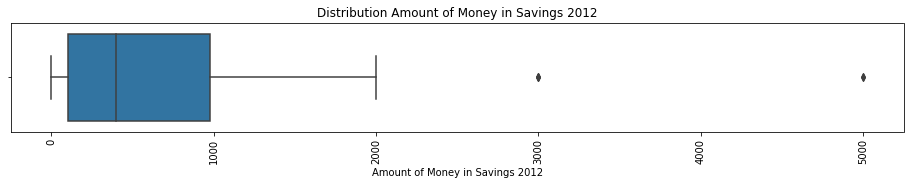

In [40]:
# Look at the distribution of the Amount of Money in Savings 2012 feature
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_maize = sns.boxplot(x=df['Amount of Money in Savings 2012'])
dist_maize.set_title("Distribution Amount of Money in Savings 2012")
plt.show()

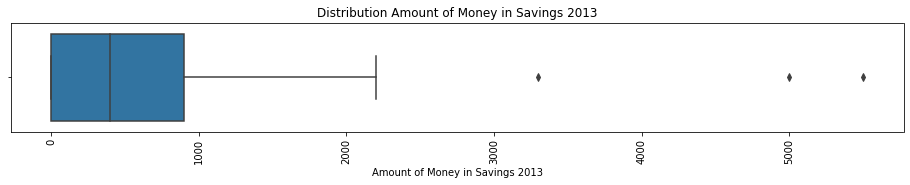

In [41]:
# Look at the distribution of the Amount of Money in Savings 2013 feature
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_maize = sns.boxplot(x=df['Amount of Money in Savings 2013'])
dist_maize.set_title("Distribution Amount of Money in Savings 2013")
plt.show()

### Observation
We see there is an extreme outlier in those different distribution and that might be related to the very large maize acre surface 10000 acres resulting is the large gap with the rest of the data distribution in the number of bag storage in 2012 and 2013 respectively and also the very large gap in the data distribution of the amount of money saved in 2012 and 2013 respectively. 

# Exploratory Data Analysis

In [42]:
# Let define a function to draw Number of Investment by Income:
def draw_Investment_frequence(z='Number of Bags in Storage 2012', y='Frequency'):
  #import matplotlib.pyplot as plt
  plt.figure(figsize=(10,4))
  plt.xticks(rotation=90)
  ax = sns.countplot(x=df[z], data=df)
  ax.set_xlabel(z)
  ax.set_ylabel(y)
  ax.set_title("Number of Investment by {}".format(z))
  plt.show()

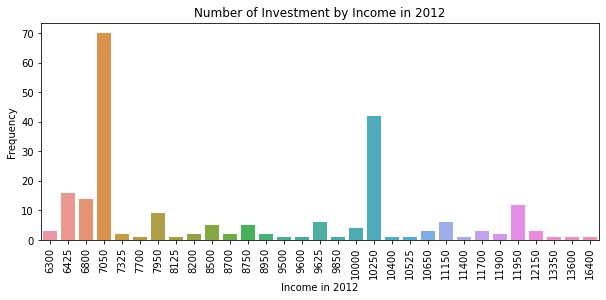

In [43]:
# Let's draw Number of Investment by Income in 2012
draw_Investment_frequence('Income in 2012', 'Frequency')

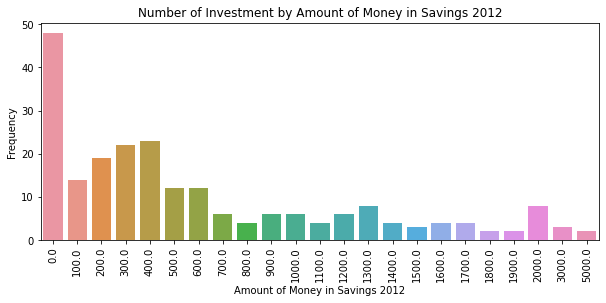

In [44]:
# Let's draw Number of Investment by Amount of Money in Savings 2012
draw_Investment_frequence('Amount of Money in Savings 2012', 'Frequency')

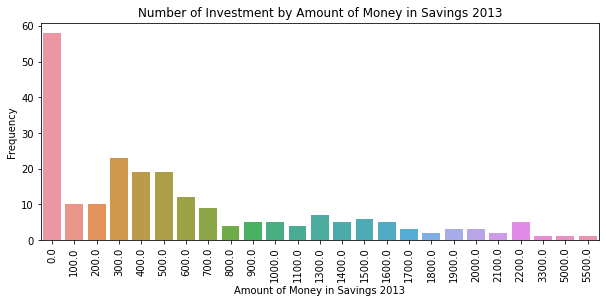

In [45]:
# Let's draw Number of Investment by Amount of Money in Savings 2013
draw_Investment_frequence('Amount of Money in Savings 2013', 'Frequency')

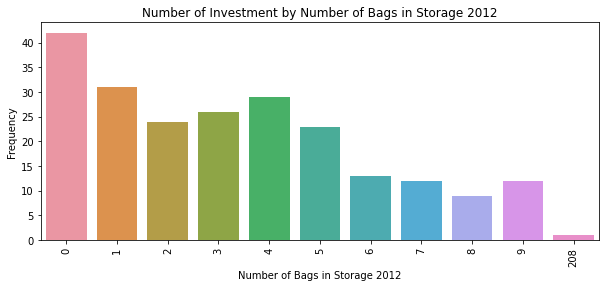

In [46]:
# Let's draw Number of Investment by Income in 2012
draw_Investment_frequence('Number of Bags in Storage 2012', 'Frequency')

In [47]:
df.columns

Index(['Group', 'District Name', 'Field Manager', 'Site Name', 'Field Officer',
       'Group Name', 'Client Name', 'OAFID', 'Own at least 1 cow',
       'Income in 2012', '% Repaid', 'Risky', 'Maize acres',
       'Own a Solar Light', 'Number of Bags in Storage 2012',
       'Amount of Money in Savings 2012', 'Number of Bags in Storage 2013',
       'Amount of Money in Savings 2013'],
      dtype='object')

In [48]:
# define a function to draw impact of OAF risk depending on a variable:
def draw_impact_investment(categorical_vars):
  fig = plt.figure(figsize=(25, 25))
  for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(2, 2, i+1)
    df.groupby([var, 'Risky'])[var].count().unstack('Risky').plot(ax=ax, kind='bar', stacked=True)

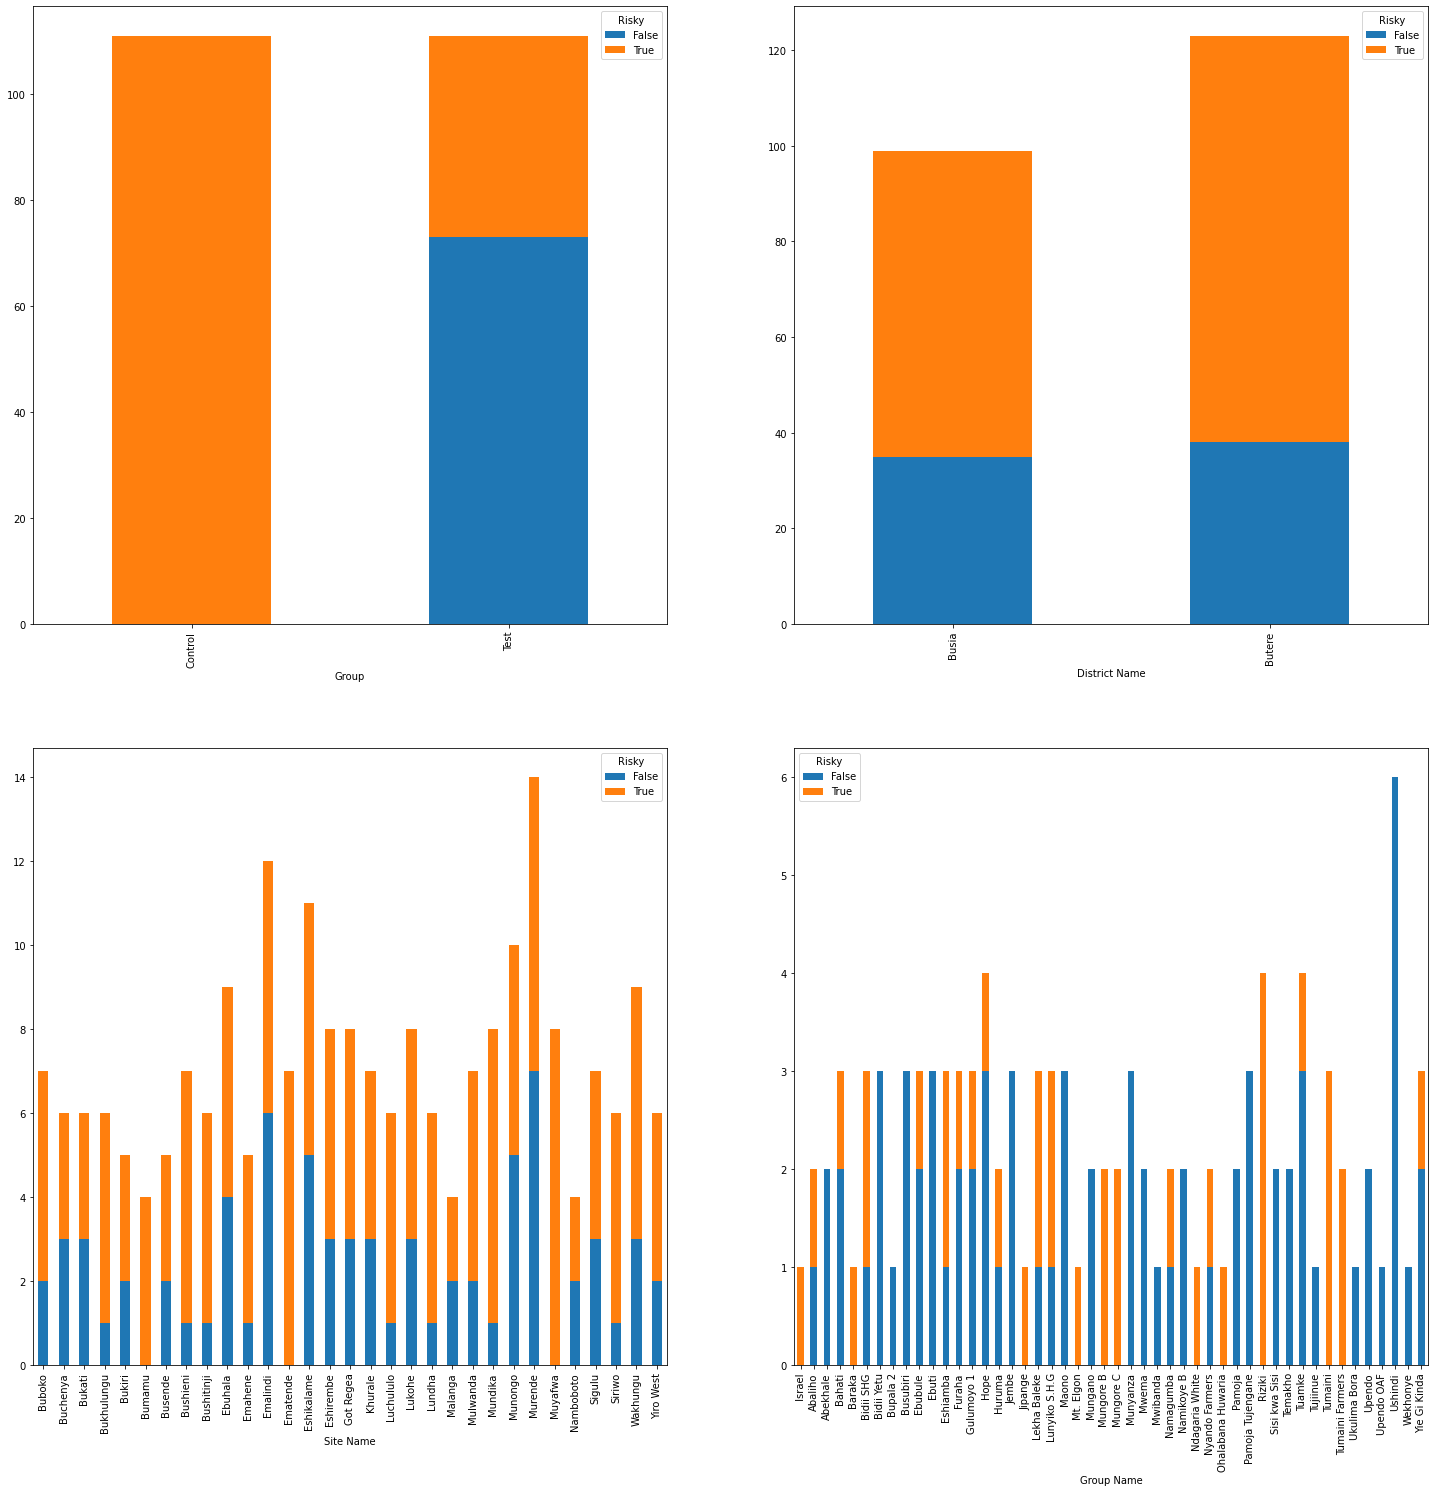

In [49]:
# First, let's look at categorical variables
categorical_vars = ['Group', 'District Name', 'Site Name', 'Group Name']
draw_impact_investment(categorical_vars)

For all categorical variables the distributions of risky or not risky for different categories look very similar. There is clear  indication of risk impact related to **expimentale zone of investment (zone of test)** of these variables having bigger then others impact on characteristics. The charts confirm about 75% zone of test rate most categories.

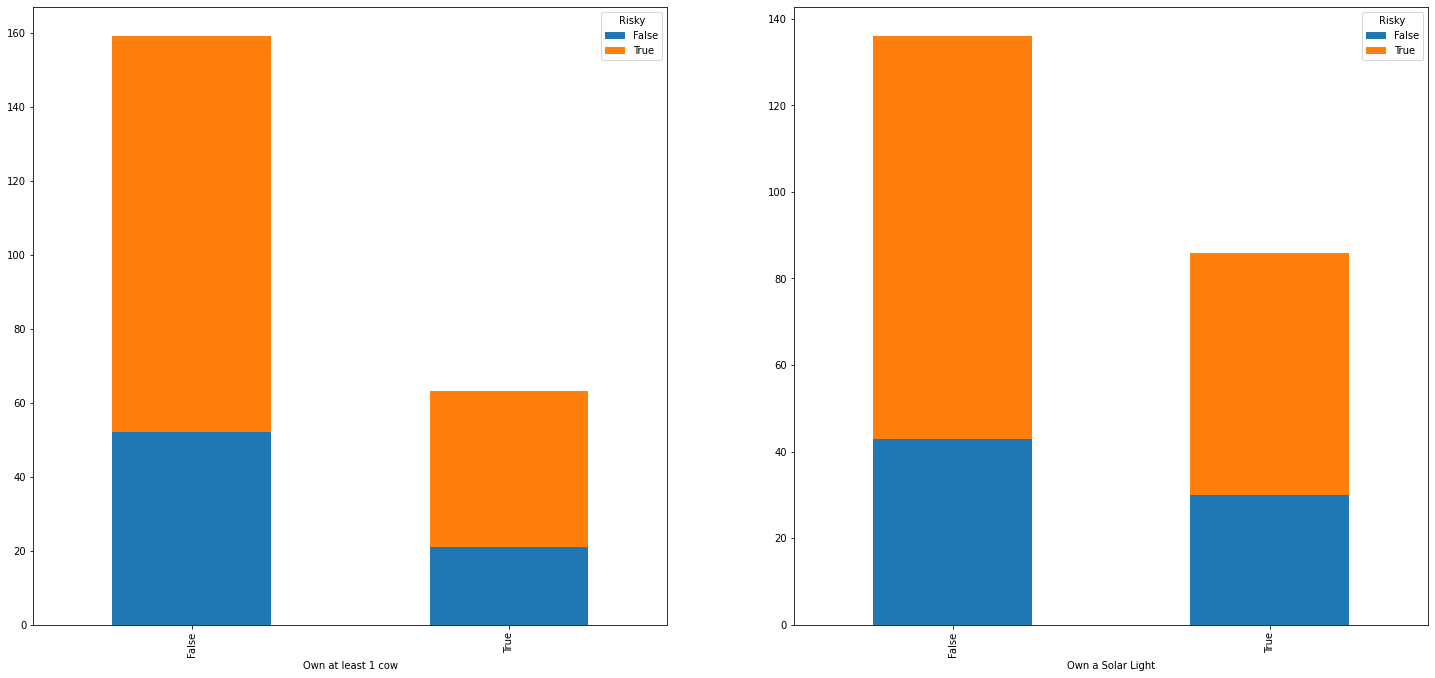

In [50]:
# First, let's look at categorical variables
categorical_vars2 = ['Own at least 1 cow', 'Own a Solar Light']
draw_impact_investment(categorical_vars2)

## Correlation Analysis
Determine which indicators are most closely correlated and describe the correlation (either statistic or matrix)

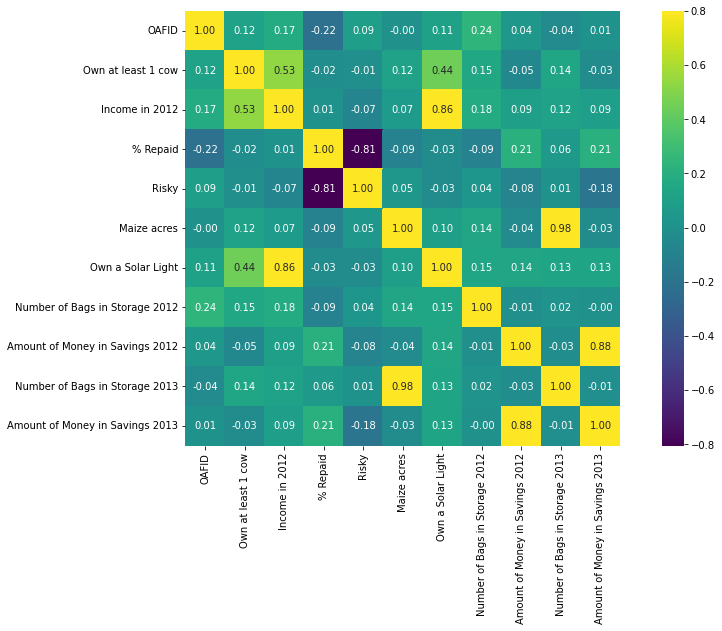

In [58]:
# Let us plot heatmap correlationa matrix
plt.subplots(figsize=(15, 8))
corrmat= df.corr()
sns.heatmap(corrmat, cbar=True,  vmax=.8,annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            cmap='viridis', linecolor="white")

- There is a high positive correlation between the amount of money saved in 2012 and the amount of money saved in 2013. The amount of money saved in 2012 increased compared to the previous year's amount of money saved.
- There is a high positive correlation between the amount of money saved in 2013 and maize acres. This means the amount of money saved in 2013 increased with the rising maize acre.
- Owing a solar light is highly correlated to income in 2012. All groups of farmers who owned a solar light in 2012 were those who had an income above average.
- There is a high negative correlation between risk and repaid. The client that has a higher risk with a higher risk of investment was not able to invest and potentially failed to refund back One Acre Fund.




In [52]:
df['Own a Solar Light'] = df['Own a Solar Light'].astype('int')
df['Own at least 1 cow'] = df['Own at least 1 cow'].astype('int')
df['Risky'] = df['Risky'].astype('int')

### Produce a scatter plot to show the most highly correlated variables

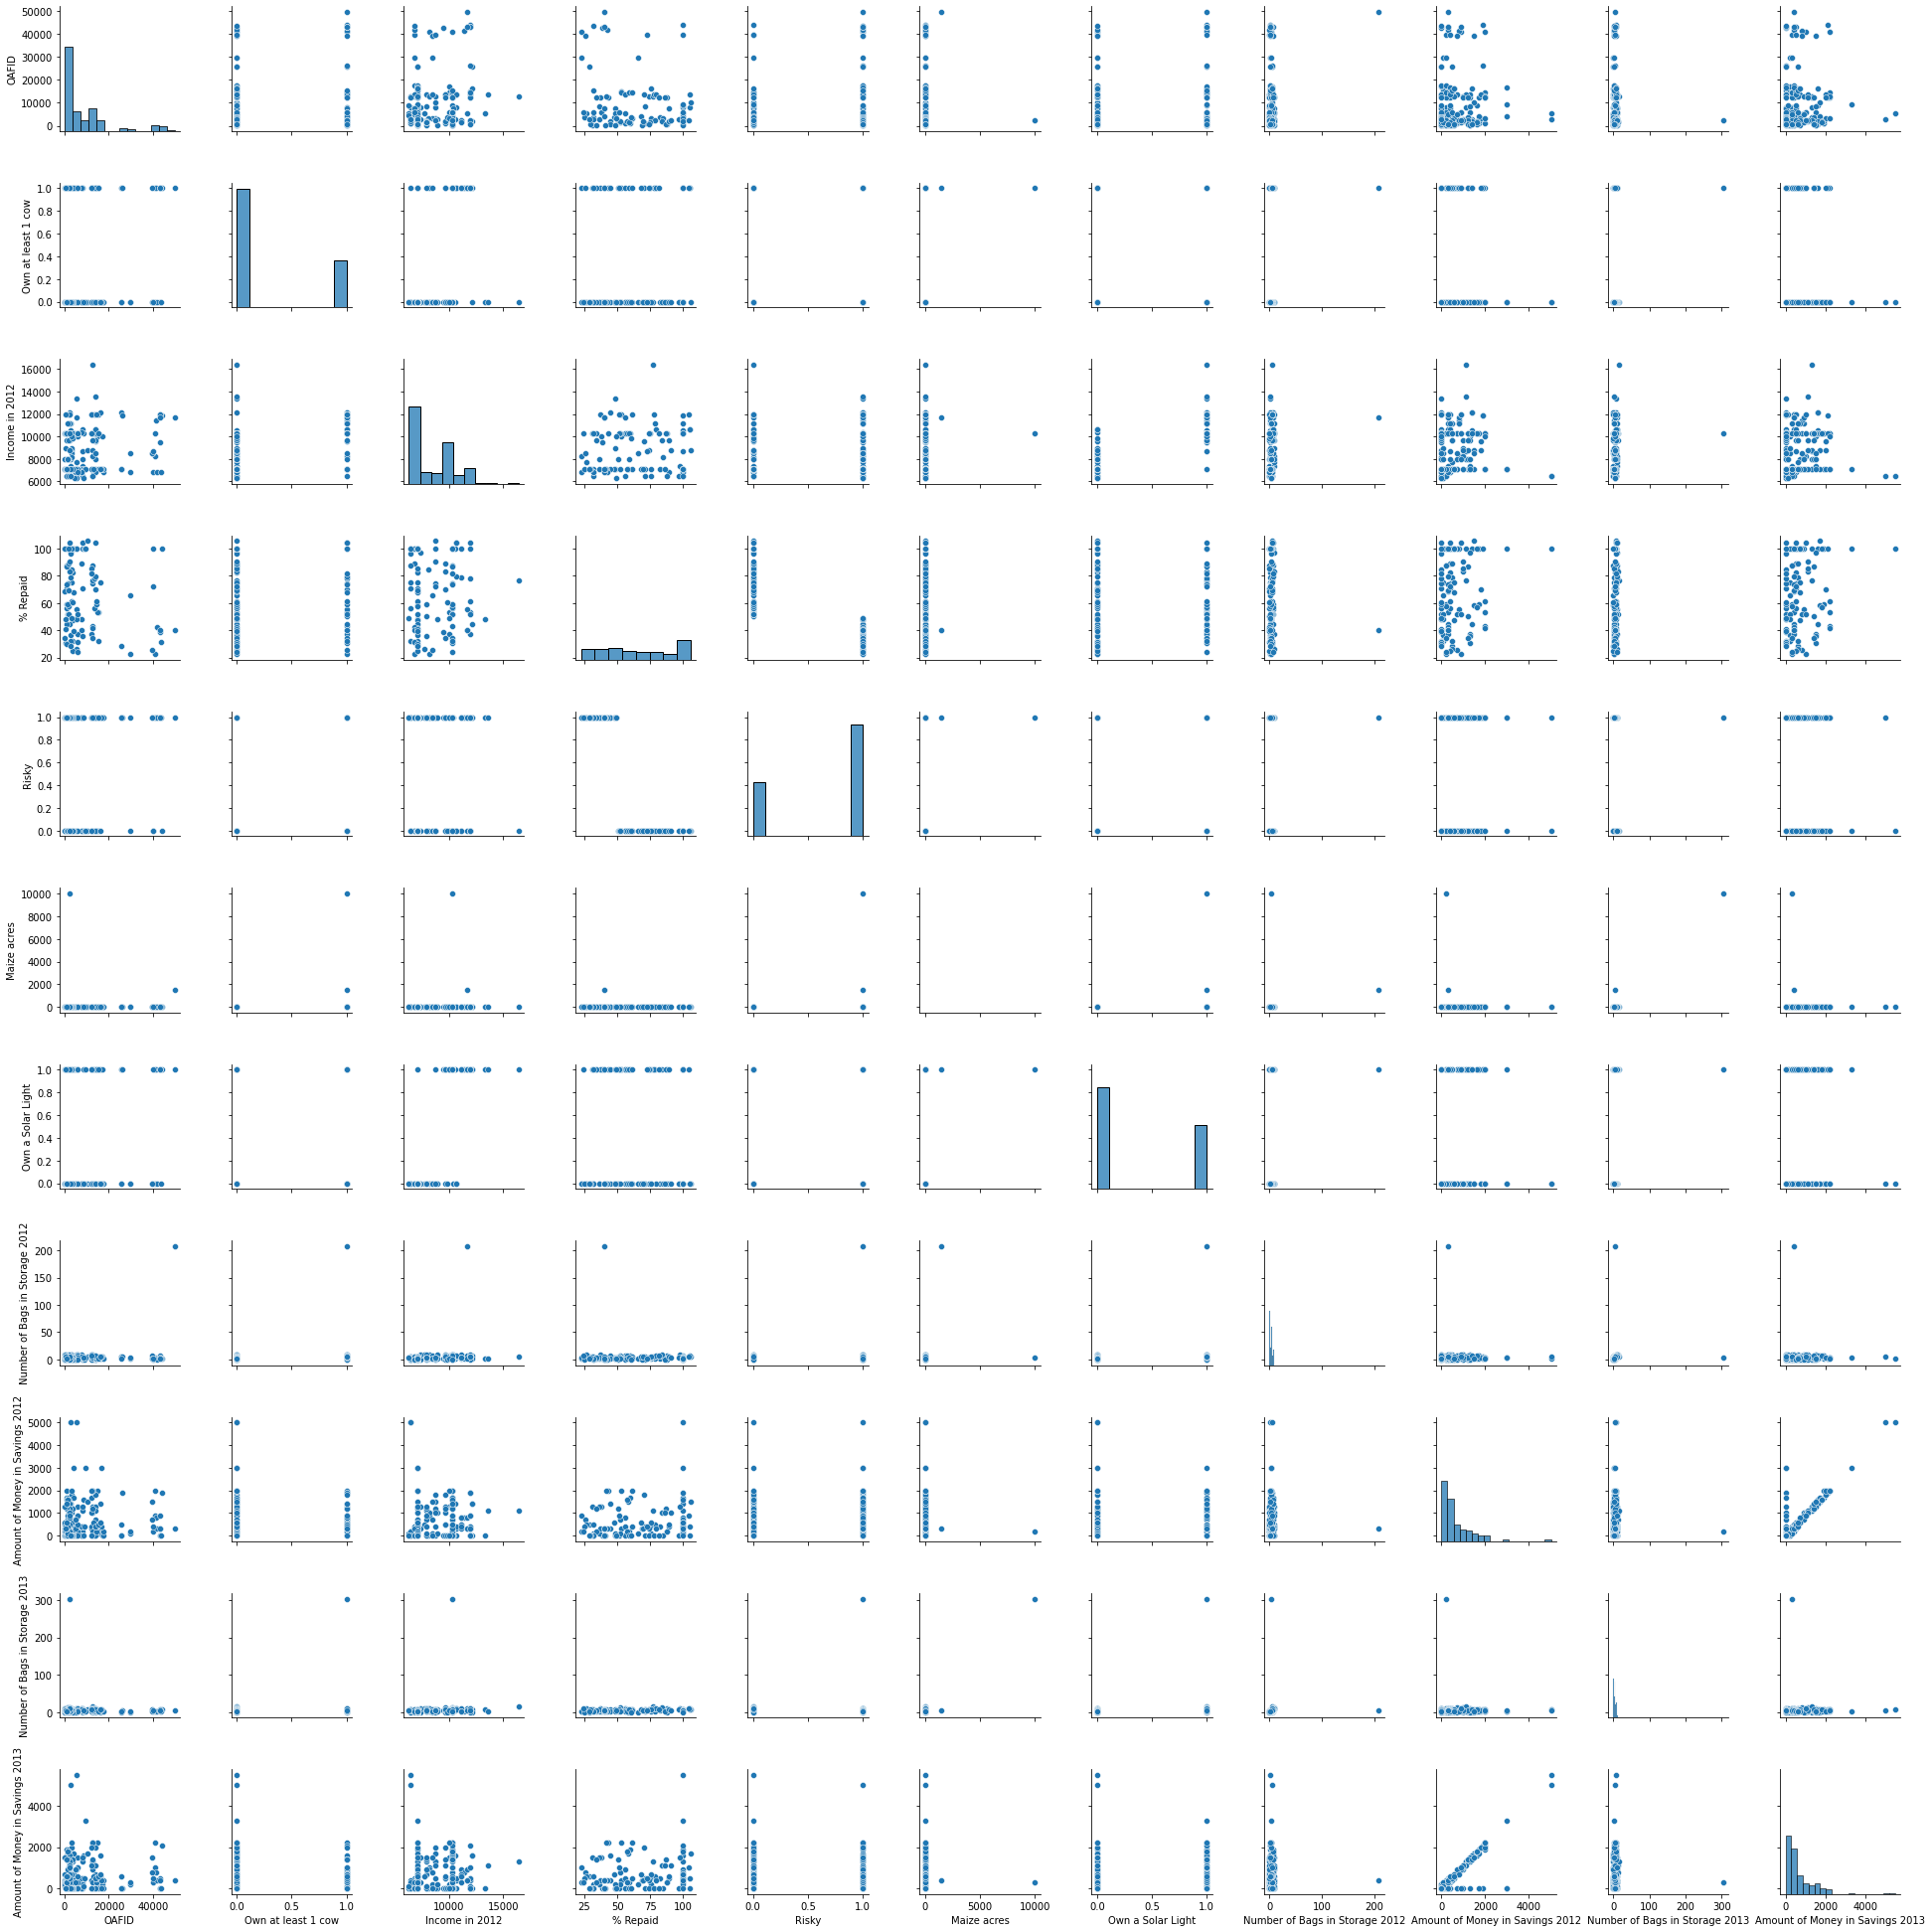

In [53]:
sns.pairplot(df[['OAFID', 'Own at least 1 cow', 'Income in 2012', '% Repaid', 'Risky', 'Maize acres','Own a Solar Light', 
                 'Number of Bags in Storage 2012', 'Amount of Money in Savings 2012', 'Number of Bags in Storage 2013',
                 'Amount of Money in Savings 2013']])

The scatter plot correlation confirm the observation made above.
## T-Test Analysis
Use a t-test to understand the statistical significance of:
- Baseline food security
- Post intervention food security
- Difference-in-difference of food security

**Food Security,** ‘exists when all people, at all times, have physical, social and economic access to sufficient safe and nutritious food that meets their dietary needs and food preferences for an active and healthy life’.

And for now the only information related to food delivers here is related to maize. That does not give us a lot of information to speak of food security. 

## Conclusion:
The risk of One Acre Fund to invest is largely influenced or depends largely on the association of farmers and slightly influenced by the site where the association farmers operate.

Furthermore, the clients in the test are those who expose **One Acre Fund** to higher risk compared to those who are controlled. In consequence, they are those who might more probably fail to repay back the investment provided to them.